<a id='top'></a>

# CSCI3022 S21
# Homework 7: Regression Practice
***

**Name**: Pourna Sengupta

***

This assignment is due on Canvas by **MIDNIGHT on Friday, April 22**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Data Set 1](#p1) | [Data Set 2](#p2) | [Data Set 3](#p3) |  [Data Set 4](#p4) |
---

In [1]:
#old salwarts
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

#new friends
import seaborn as sns
import statsmodels.api as sm #this line is now always in our opener
from statsmodels.stats.outliers_influence import summary_table
from patsy import dmatrices # for making design matrices out of categorical features #instead of sm.add_constant


## [All problems: 11 points/ea]
**Shortcuts:**  [1](#p1) | [2](#p2) | [3](#p3) | [4](#p4) |


Run the cell below to load in the data set known as "Anscombe's Quartet."  It contains 4 data sets, each with its own set of $x$ and $y$ values.


Each data set has exactly 11 observations.  For each data set, you will perform the same steps of visualizing and fitting a linear model.

In [8]:
df = sns.load_dataset("anscombe")

print(df.head())
df['dataset'].unique()

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


array(['I', 'II', 'III', 'IV'], dtype=object)

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [25 points] Data Set 1

For the data set marked with "I" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

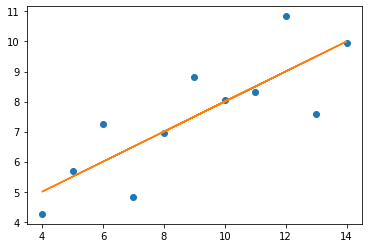

In [38]:
def plotlsf(df): 
    ds1 = df[df.dataset == "I"]
    m, b = np.polyfit(ds1.x, ds1.y, 1)
    plt.plot(ds1.x, ds1.y, 'o')
    plt.plot(ds1.x, (m * ds1.x) + b)
plotlsf(df)


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

Residuals: 
 [1.52100000e-03 2.58248760e-03 3.69128889e+00 1.71371901e+00
 2.92720992e-02 1.71095041e-03 1.53602222e+00 5.48272934e-01
 3.38125231e+00 2.82484417e+00 3.22039339e-02] 



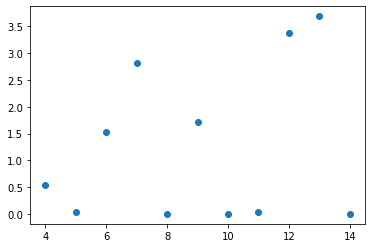

In [39]:
def plotrlsf(df): 
    ds1 = df[df.dataset == "I"]
    m, b = np.polyfit(ds1.x, ds1.y, 1)
    r = np.array(np.square((ds1.y - ((m * ds1.x) + b))))
    plt.plot(ds1.x, r, 'o')
    
    print("Residuals: \n", r, "\n")
                 
plotrlsf(df)


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

## Simple Linear Regression Model Assumptions:
<br> 
     (1) Linear Relationship: Met <br> 
    The first data set in Anscombe's Quartet shows a linear relationship between x and y, showing that y is dependent on the value of the independent variable x. 
    <br>
     (2) Independence: Met <br> 
    The residuals, shown in the second plot, do not show a linear relationship, and therefore show independence. 
    <br> 
     (3) Constant Residual Variance: Not Met <br> 
    The residuals do not vary consitently throughtout all x values in the dataset. 
    <br> 
     (4) Normality: Not Met <br> 
    The residuals of the model are not normally distributed. 
    <br> 


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

Old Residuals:  [1.52100000e-03 2.58248760e-03 3.69128889e+00 1.71371901e+00
 2.92720992e-02 1.71095041e-03 1.53602222e+00 5.48272934e-01
 3.38125231e+00 2.82484417e+00 3.22039339e-02] 

New Residuals: 
 [[6.40160010e+01 4.90114552e+01 9.02741834e+01 5.62636372e+01
  7.22685466e+01 1.00027275e+02 3.60076368e+01 2.50045457e+01
  8.10212741e+01 4.22594551e+01 3.02560003e+01]
 [6.40160010e+01 4.90114552e+01 9.02741834e+01 5.62636372e+01
  7.22685466e+01 1.00027275e+02 3.60076368e+01 2.50045457e+01
  8.10212741e+01 4.22594551e+01 3.02560003e+01]
 [3.35241000e-01 2.49381521e+00 8.48743438e-01 1.16443719e+00
  6.22664463e-03 2.02027459e+00 6.65311677e+00 1.28131457e+01
  1.77394124e-01 4.32337507e+00 9.48304030e+00]
 [3.64810000e-02 6.54775215e-01 2.86040344e+00 9.55371901e-02
  4.77606645e-01 4.80207459e+00 3.27379677e+00 7.89354566e+00
  1.41891412e+00 1.71419507e+00 5.33358030e+00]
 [6.40160010e+01 4.90114552e+01 9.02741834e+01 5.62636372e+01
  7.22685466e+01 1.00027275e+02 3.60076368e+01

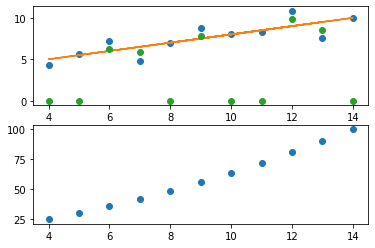

In [133]:
def plotcombo(ds1, x, y): 
    m, b = np.polyfit(ds1.x, ds1.y, 1)
    ds1x = np.array(ds1.loc[:, "x"])
    ds1y = np.zeros([11, 1])
    r = np.zeros([11,1])
    ry = np.array((m*ds1.x) + b)
    for i in range(0, 10): 
        if(ry[i] - y[i] >= 1): 
            ds1y[i] = y[i] + 1
        elif(ry[i] - y[i] <= -1): 
            ds1y[i] = y[i] - 1
    oldr = np.square(y - ry)    
    r = np.array(np.square((ds1y - ((m * ds1x) + b))))
    
    print("Old Residuals: ", oldr, "\n")
    print("New Residuals: \n", r, "\n")
    return (ds1y, r)
                
    
def main():
    set1 = df[df.dataset == "I"]
    x1 = np.array(set1.loc[:, "x"])
    y1 = np.array(set1.loc[:, "y"])
    
    m, b = np.polyfit(set1.x, set1.y, 1)

        
    (newY, r1) = plotcombo(set1, x1, y1)
    
    fig, axs = plt.subplots(2)
    axs[0].plot(set1.x, set1.y, 'o')
    axs[0].plot(set1.x, m * set1.x + b)
    axs[0].plot(x1, newY, 'o')

    axs[1].plot(x1, r1[10], 'o')
main()


##### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

I adjusted any vaulues that were varied by a difference of one or more to a smaller variance. 

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Data Set 2

For the data set marked with "II" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

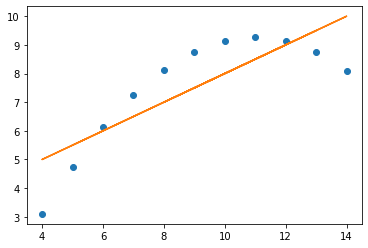

In [134]:
def plotlsf(df): 
    ds1 = df[df.dataset == "II"]
    m, b = np.polyfit(ds1.x, ds1.y, 1)
    plt.plot(ds1.x, ds1.y, 'o')
    plt.plot(ds1.x, (m * ds1.x) + b)
plotlsf(df)


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

Residuals: 
 [1.2975281  1.2975281  0.57898264 1.61059174 0.57621901 3.61345537
 0.01666446 3.61345537 0.01666446 0.57621901 0.57898264] 



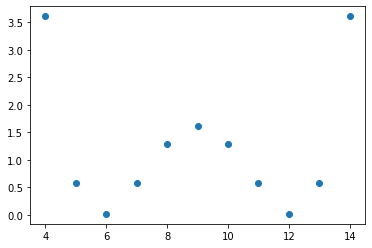

In [135]:
def plotrlsf(df): 
    ds1 = df[df.dataset == "II"]
    m, b = np.polyfit(ds1.x, ds1.y, 1)
    r = np.array(np.square((ds1.y - ((m * ds1.x) + b))))
    plt.plot(ds1.x, r, 'o')
    
    print("Residuals: \n", r, "\n")
                 
plotrlsf(df)


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

## Simple Linear Regression Model Assumptions:
<br> 
     (1) Linear Relationship: Not Met <br> 
    The first data set in Anscombe's Quartet shows a quadratic relationship between x and y.
    <br>
     (2) Independence: Met <br> 
    The residuals, shown in the second plot, does not show a linear relationship, and therefore shows independence. 
    <br> 
     (3) Constant Residual Variance: Not Met <br> 
    The residuals do not vary consitently throughtout all x values in the dataset. 
    <br> 
     (4) Normality: Not Met <br> 
    The residuals of the model are not normally distributed. 
    <br> 


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

Old Residuals:  [1.2975281  1.2975281  0.57898264 1.61059174 0.57621901 3.61345537
 0.01666446 3.61345537 0.01666446 0.57621901 0.57898264] 

New Residuals: 
 [[7.41164463e-01 1.93462810e-02 5.57389174e+00 1.30255372e-01
  1.85207355e+00 8.18480083e+00 1.29752810e+00 4.57570992e+00
  3.46298264e+00 4.08437190e-01 2.68661901e+00]
 [3.46298264e+00 7.41164463e-01 1.12957099e+01 1.85207355e+00
  5.57389174e+00 1.49066190e+01 1.93462810e-02 1.29752810e+00
  8.18480083e+00 1.30255372e-01 4.08437190e-01]
 [1.58989174e+00 6.80735537e-02 7.62261901e+00 5.78982645e-01
  3.10080083e+00 1.06335281e+01 5.46255372e-01 3.02443719e+00
  5.11170992e+00 5.71644628e-02 1.53534628e+00]
 [1.51513719e+00 5.33190083e-02 7.45786446e+00 5.34228099e-01
  2.99604628e+00 1.04387736e+01 5.91500826e-01 3.12968264e+00
  4.97695537e+00 7.24099174e-02 1.61059174e+00]
 [5.48946281e-01 6.71280992e-02 5.02167355e+00 5.80371901e-02
  1.53985537e+00 7.51258264e+00 1.58530992e+00 5.10349174e+00
  3.03076446e+00 5.76219008e-

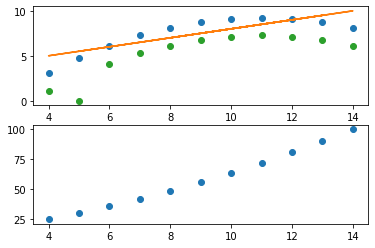

In [198]:
def plotcombo(ds1, x, y): 
    m, b = np.polyfit(ds1.x, ds1.y, 1)
    ds1x = np.array(ds1.loc[:, "x"])
    ds1y = np.zeros([11, 1])
    r = np.zeros([11,1])
    ry = np.array((m*ds1.x) + b)
    for i in range(0, 10): 
        if(y[i] >= 2): 
            ds1y[i] = y[i] - 2
    oldr = np.square(y - ry)    
    r = np.array(np.square((ds1y - ((m * ds1x) + b))))
    
    print("Old Residuals: ", oldr, "\n")
    print("New Residuals: \n", r, "\n")
    return (ds1y, r)
                
    
def main():
    set2 = df[df.dataset == "II"]
    x2 = np.array(set2.loc[:, "x"])
    y2 = np.array(set2.loc[:, "y"])
    
    m, b = np.polyfit(set2.x, set2.y, 1)    
    fig, axs = plt.subplots(2)
    axs[0].plot(set2.x, set2.y, 'o')
    axs[0].plot(set2.x, m * set2.x + b)
    
    (newY, r1) = plotcombo(set2, x2, y2)

    axs[0].plot(x2, newY, 'o')
    axs[1].plot(x2, r1[10], 'o')
main()



#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

I reduced the two outying values to better match the data set. 

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
## [25 points] Data Set 3

For the data set marked with "III" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

Residuals: 
 [2.91305529e-01 5.30255289e-02 1.05046703e+01 1.52100000e-01
 4.75347570e-01 1.34243822e+00 6.26976033e-03 1.51038223e-01
 7.21109760e-01 6.48757025e-03 5.23993719e-02] 



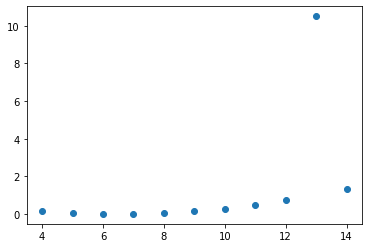

In [199]:
def plotrlsf(df): 
    ds1 = df[df.dataset == "III"]
    m, b = np.polyfit(ds1.x, ds1.y, 1)
    r = np.array(np.square((ds1.y - ((m * ds1.x) + b))))
    plt.plot(ds1.x, r, 'o')
    
    print("Residuals: \n", r, "\n")
                 
plotrlsf(df)


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

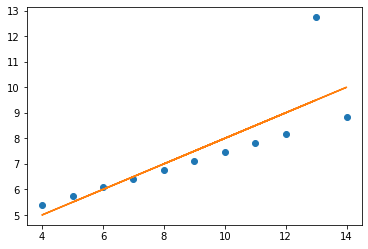

In [200]:
def plotlsf(df): 
    ds1 = df[df.dataset == "III"]
    m, b = np.polyfit(ds1.x, ds1.y, 1)
    plt.plot(ds1.x, ds1.y, 'o')
    plt.plot(ds1.x, (m * ds1.x) + b)
plotlsf(df)


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

## Simple Linear Regression Model Assumptions:
<br> 
     (1) Linear Relationship: Not Met <br> 
    The first data set in Anscombe's Quartet shows a slightly exponential, mostly linear relationship between x and y.
    <br>
     (2) Independence: Not Met <br> 
    The residuals, shown in the second plot, show a linear relationship, and therefore shows dependence. 
    <br> 
     (3) Constant Residual Variance:  Met <br> 
    The residuals do vary consitently throughtout all x values in the dataset. 
    <br> 
     (4) Normality: Not Met <br> 
    The residuals of the model are not normally distributed. 
    <br> 


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

Old Residuals:  [2.06611570e-07 1.52217912e-06 1.72710406e-05 2.56535672e-05
 1.21858661e-06 4.05211671e-06 7.79642435e-06 1.05414066e-07
 1.14015854e-05 6.74650025e-06] 

New Residuals: 
 [[55.64481839 45.81619633 50.61121337 60.91701137 78.1651181  36.94192613
  29.0220078  66.42779231 41.25976725 32.86267298]
 [55.64481839 45.81619633 50.61121337 60.91701137 78.1651181  36.94192613
  29.0220078  66.42779231 41.25976725 32.86267298]
 [55.64481839 45.81619633 50.61121337 60.91701137 78.1651181  36.94192613
  29.0220078  66.42779231 41.25976725 32.86267298]
 [55.64481839 45.81619633 50.61121337 60.91701137 78.1651181  36.94192613
  29.0220078  66.42779231 41.25976725 32.86267298]
 [55.64481839 45.81619633 50.61121337 60.91701137 78.1651181  36.94192613
  29.0220078  66.42779231 41.25976725 32.86267298]
 [55.64481839 45.81619633 50.61121337 60.91701137 78.1651181  36.94192613
  29.0220078  66.42779231 41.25976725 32.86267298]
 [55.64481839 45.81619633 50.61121337 60.91701137 78.1651181 

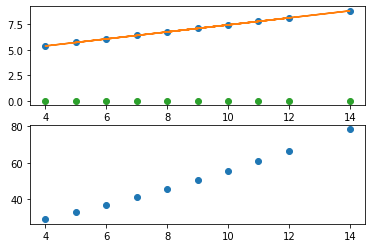

In [203]:
def plotcombo(ds1, x, y): 
    m, b = np.polyfit(ds1.x, ds1.y, 1)
    ds1x = np.array(ds1.loc[:, "x"])
    ds1y = np.zeros([10, 1])
    r = np.zeros([10,1])
    ry = np.array((m*ds1.x) + b)
   
    oldr = np.square(y - ry)    
    r = np.array(np.square((ds1y - ((m * ds1x) + b))))
    
    print("Old Residuals: ", oldr, "\n")
    print("New Residuals: \n", r, "\n")
    return (ds1y, r)
                
    
def main():
    set3 = df[df.dataset == "III"]
    set3 = set3.drop(24)
    x3 = np.array(set3.loc[:, "x"])
    y3 = np.array(set3.loc[:, "y"])
    
    m, b = np.polyfit(set3.x, set3.y, 1)    
    fig, axs = plt.subplots(2)
    axs[0].plot(set3.x, set3.y, 'o')
    axs[0].plot(set3.x, m * set3.x + b)
    
    (newY, r1) = plotcombo(set3, x3, y3)

    axs[0].plot(x3, newY, 'o')
    axs[1].plot(x3, r1[9], 'o')
main()



#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

I adjusted the outlying value at x = 13. 

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
## [25 points] Data Set 4

For the data set marked with "IV" in the given data frame, perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

Residuals: 
 [1.77241000e-01 1.54008100e+00 5.02681000e-01 3.38192100e+00
 2.15796100e+00 1.52100000e-03 3.06600100e+00 1.26217745e-29
 2.07648100e+00 8.26281000e-01 1.23210000e-02] 



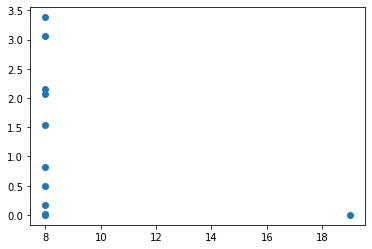

In [204]:
def plotrlsf(df): 
    ds1 = df[df.dataset == "IV"]
    m, b = np.polyfit(ds1.x, ds1.y, 1)
    r = np.array(np.square((ds1.y - ((m * ds1.x) + b))))
    plt.plot(ds1.x, r, 'o')
    
    print("Residuals: \n", r, "\n")
                 
plotrlsf(df)


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

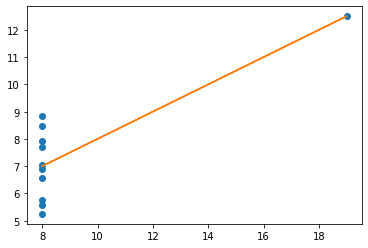

In [205]:
def plotlsf(df): 
    ds1 = df[df.dataset == "IV"]
    m, b = np.polyfit(ds1.x, ds1.y, 1)
    plt.plot(ds1.x, ds1.y, 'o')
    plt.plot(ds1.x, (m * ds1.x) + b)
plotlsf(df)


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

## Simple Linear Regression Model Assumptions:
<br> 
     (1) Linear Relationship: Not Met <br> 
    The first data set in Anscombe's Quartet shows a slightly exponential, mostly linear relationship between x and y.
    <br>
     (2) Independence: Not Met <br> 
    The residuals, shown in the second plot, show a linear relationship, and therefore shows dependence. 
    <br> 
     (3) Constant Residual Variance: Not Met <br> 
    The residuals do not vary consitently throughtout all x values in the dataset. 
    <br> 
     (4) Normality: Not Met <br> 
    The residuals of the model are not normally distributed. 
    <br> 


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

<ipython-input-193-08507b680ec3>:31: RankWarning: Polyfit may be poorly conditioned
  main()
<ipython-input-193-08507b680ec3>:27: RankWarning: Polyfit may be poorly conditioned
  (newY, r1) = plotcombo(set3, x3, y3)


Old Residuals:  [0.998001 0.998001 0.998001 0.998001 0.998001 0.998001 0.998001 0.998001
 0.998001 0.998001] 

New Residuals: 
 [[40.70007766 36.25075514 47.25334533 54.29556595 51.93586728 43.30877128
  33.61336153 35.20461256 48.46414432 42.44920739]
 [40.70007766 36.25075514 47.25334533 54.29556595 51.93586728 43.30877128
  33.61336153 35.20461256 48.46414432 42.44920739]
 [40.70007766 36.25075514 47.25334533 54.29556595 51.93586728 43.30877128
  33.61336153 35.20461256 48.46414432 42.44920739]
 [40.70007766 36.25075514 47.25334533 54.29556595 51.93586728 43.30877128
  33.61336153 35.20461256 48.46414432 42.44920739]
 [40.70007766 36.25075514 47.25334533 54.29556595 51.93586728 43.30877128
  33.61336153 35.20461256 48.46414432 42.44920739]
 [40.70007766 36.25075514 47.25334533 54.29556595 51.93586728 43.30877128
  33.61336153 35.20461256 48.46414432 42.44920739]
 [40.70007766 36.25075514 47.25334533 54.29556595 51.93586728 43.30877128
  33.61336153 35.20461256 48.46414432 42.4492073

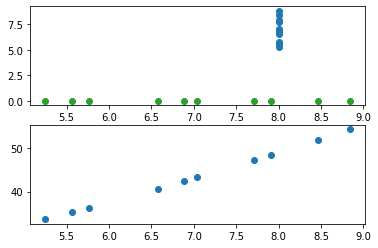

In [193]:
def plotcombo(ds1, x, y): 
    m, b = np.polyfit(ds1.x, ds1.y, 1)
    ds1x = np.array(ds1.loc[:, "y"])
    ds1y = np.zeros([10, 1])
    r = np.zeros([10,1])
    ry = np.array((m*ds1.x) + b)
   
    oldr = np.square(y - ry)    
    r = np.array(np.square((ds1y - ((m * ds1x) + b))))
    
    print("Old Residuals: ", oldr, "\n")
    print("New Residuals: \n", r, "\n")
    return (ds1y, r)
                
    
def main():
    set3 = df[df.dataset == "IV"]
    set3 = set3.drop(40)
    x3 = np.array(set3.loc[:, "y"])
    y3 = np.array(set3.loc[:, "x"])
    
    m, b = np.polyfit(set3.x, set3.y, 1)    
    fig, axs = plt.subplots(2)
    axs[0].plot(set3.x, set3.y, 'o')
    axs[0].plot(set3.x, m * set3.x + b)
    
    (newY, r1) = plotcombo(set3, x3, y3)

    axs[0].plot(x3, newY, 'o')
    axs[1].plot(x3, r1[9], 'o')
main()



#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

I adjusted the outlying value and swapped the x and y data sets. 